In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the dataset
data = pd.read_csv('/Users/raghavmehra/Documents/Reduced_Sampled_Supermarket_Sales_Data.csv')

# Display the first few rows to verify it's loaded correctly
data.head()


,Unnamed: 0,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,0,2023-03-06,15:18:20.721,102900011030110,1.0,4.9,sale,No,Spinach (Bag),1011010101,Flower/Leaf Vegetables,1.33,9.43
1,1,2023-03-06,15:18:20.721,102900011030110,1.0,4.9,sale,No,Spinach (Bag),1011010101,Flower/Leaf Vegetables,1.39,9.43
2,2,2023-03-06,15:18:20.721,102900011030110,1.0,4.9,sale,No,Spinach (Bag),1011010101,Flower/Leaf Vegetables,1.15,9.43
3,3,2023-03-06,15:18:20.721,102900011030110,1.0,4.9,sale,No,Spinach (Bag),1011010101,Flower/Leaf Vegetables,1.38,9.43
4,4,2023-03-06,15:18:20.721,102900011030110,1.0,4.9,sale,No,Spinach (Bag),1011010101,Flower/Leaf Vegetables,1.32,9.43


In [6]:
# Get basic information about the dataset
data.info()

# Get summary statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689400 entries, 0 to 689399
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   689400 non-null  int64  
 1   Date                         689400 non-null  object 
 2   Time                         689400 non-null  object 
 3   Item Code                    689400 non-null  int64  
 4   Quantity Sold (kilo)         689400 non-null  float64
 5   Unit Selling Price (RMB/kg)  689400 non-null  float64
 6   Sale or Return               689400 non-null  object 
 7   Discount (Yes/No)            689400 non-null  object 
 8   Item Name                    689400 non-null  object 
 9   Category Code                689400 non-null  int64  
 10  Category Name                689400 non-null  object 
 11  Wholesale Price (RMB/kg)     689400 non-null  float64
 12  Loss Rate (%)                689400 non-null  float64
dtyp

Unnamed: 0                     0
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

In [7]:
# Drop rows with missing values
data_clean = data.dropna()

# Verify that there are no missing values
data_clean.isnull().sum()


Unnamed: 0                     0
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

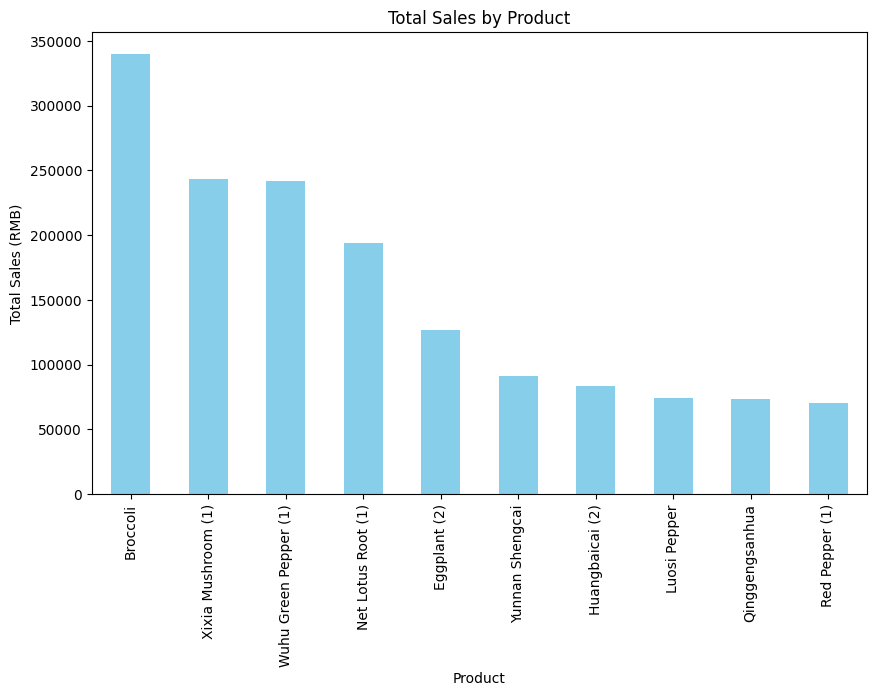

In [8]:
data_clean["Total Sales"] = data_clean["Quantity Sold (kilo)"] * data_clean['Unit Selling Price (RMB/kg)']
sales_by_product = data_clean.groupby("Item Name")["Total Sales"].sum()
sales_by_product.sort_values(ascending=False).head(10).plot(kind="bar", color= "skyblue", figsize=(10,6))
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales (RMB)')
plt.show()
                                                            

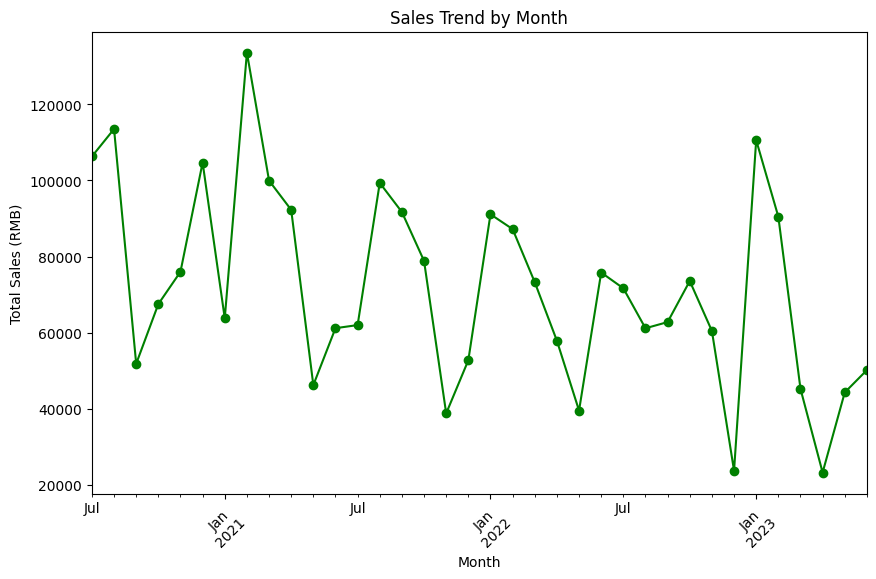

In [9]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'])

# Create a new column for the month
data_clean['Month'] = data_clean['Date'].dt.to_period('M')

# Group by month and sum the total sales
monthly_sales = data_clean.groupby('Month')['Total Sales'].sum()

# Plot the sales trend over months
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (RMB)')
plt.xticks(rotation=45)
plt.show()


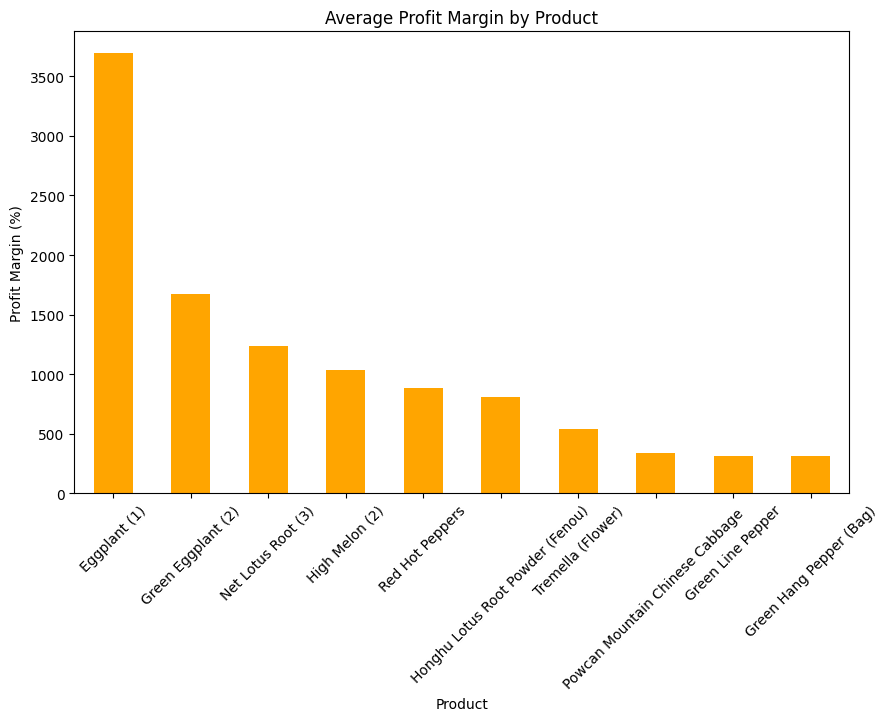

In [10]:
# Calculate profit margin for each product
data_clean['Profit Margin (%)'] = (data_clean['Unit Selling Price (RMB/kg)'] - data_clean['Wholesale Price (RMB/kg)']) / data_clean['Wholesale Price (RMB/kg)'] * 100

# Group by Item Name and calculate average profit margin
profit_margin_by_product = data_clean.groupby('Item Name')['Profit Margin (%)'].mean().sort_values(ascending=False)

# Plot the top 10 products by profit margin
plt.figure(figsize=(10, 6))
profit_margin_by_product.head(10).plot(kind='bar', color='orange')
plt.title('Average Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

